In [1]:
import numpy as np
import pandas as pd
import pycountry as pyc

import plotly
import telepyth
import datetime

import plotly.plotly as py
from plotly.graph_objs import Choropleth
from plotly.offline import init_notebook_mode, iplot
from IPython.display import display, HTML


Use token from .telepythrc.


In [2]:
init_notebook_mode(connected=True)

In [3]:
#plotly.tools.set_credentials_file(username='gregunz', api_key='9Bjk9dgyfCIwVgunlRj2')

In [4]:
#export = plotly.offline.plot(data, include_plotlyjs=False, output_type='div')

In [5]:
start_date = datetime.datetime(2015, 3, 1)
end_date = datetime.datetime(2017, 12, 1)

n_months = (end_date - start_date).days * 12 // 365

dates = []
for i in range(n_months):
    index = start_date.month - 1 + i
    month = index % 12 + 1
    year = start_date.year + index // 12
    date = "{}_{:02d}".format(year, month)
    dates.append(date)

In [6]:
df = pd.read_csv('translingual_all_fully_cleaned_no_url.csv', encoding='utf-8')

In [7]:
def select_events(df, feature, selector):
    '''Example of use : select_events(selected_df, 'EventCode', lambda x: x[:2] == '08')'''
    return df[df[feature].apply(selector)]

In [21]:
all_countries = [c.alpha_3 for c in pyc.countries]

df = select_events(df, 'Target_CountryCode', lambda x: x in all_countries)

In [22]:
df['Year_Month'] = df['Day'].apply(str).apply(lambda x: x[:4] + '_' + x[4:6])

In [23]:
df = select_events(df, 'Year_Month', lambda x: x in dates)

In [24]:
%telepyth 'finished'

'finished'

In [29]:
# Pivot on countries and average on AvgTone for each month

df_aggregated = pd.pivot_table(df, values='AvgTone', index=['Target_CountryCode'], columns=['Year_Month'], aggfunc=np.median)

In [32]:
df_aggregated.head()

Year_Month,2015_03,2015_04,2015_05,2015_06,2015_07,2015_08,2015_09,2015_10,2015_11,2015_12,...,2017_02,2017_03,2017_04,2017_05,2017_06,2017_07,2017_08,2017_09,2017_10,2017_11
Target_CountryCode,,,,,,,,,,,,,,,,,,,,,
AFG,-2.990518,-4.407713,-3.254438,-3.940425,-3.322259,-4.026846,-3.533569,-3.459119,-3.730006,-3.536902,...,-4.000000,-3.658537,-3.831041,-3.947368,-4.642166,-4.337375,-3.879310,-3.009205,-3.878903,-3.225806
AGO,0.165289,0.348432,0.333333,0.460299,0.491400,0.307692,0.449438,-0.694444,0.414938,0.352113,...,0.484264,0.000000,0.291758,0.000000,0.000000,0.579715,0.354927,0.000000,0.000000,-0.363641
ALB,-1.783841,-1.195219,-1.608911,-1.089588,-1.233767,-1.851852,-1.497006,-1.704545,-2.076843,-1.670061,...,-1.469551,-1.559454,-2.263900,-0.756144,-1.073086,-1.302932,-2.439024,-0.346021,-1.199315,-2.517033
ARE,2.048857,2.247191,2.318841,2.409639,2.256169,1.969904,1.709402,2.242152,2.500000,2.765296,...,1.564945,2.001557,1.866446,1.630435,0.414938,0.790429,1.203784,1.844262,2.083333,1.931330
ARG,-1.743462,-1.041667,-0.716846,-0.746269,-0.540541,-1.131222,-0.922610,-0.668648,-0.631313,-0.902935,...,-1.176471,-1.336898,-1.390645,-1.023018,-1.162791,-1.435407,-1.431093,-1.399213,-1.193317,-1.601831


In [84]:
df_world = np.median(df_aggregated.dropna().values, axis=0)

# WORLD MAP

In [28]:
from viz import world_map_figure

colorscale_perso = [[0.0, 'rgb(165,0,38)'], [0.1111111111111111, 'rgb(215,48,39)'], [0.2222222222222222, 'rgb(244,109,67)'], [0.3333333333333333, 'rgb(253,174,97)'], [0.4444444444444444, 'rgb(254,224,144)'], [0.5555555555555556, 'rgb(224,243,248)'], [0.6666666666666666, 'rgb(171,217,233)'], [0.7777777777777778, 'rgb(116,173,209)'], [0.8888888888888888, 'rgb(69,117,180)'], [1.0, 'rgb(49,54,149)']]

default_colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],

zmin = df_aggregated.min()
zmax = df_aggregated.max()


In [ ]:
figure = world_map_figure(frames_title=dates,
                          df=df_aggregated.dropna().reset_index(),
                          locations_col='Target_CountryCode',
                          txt_fn=lambda code: pyc.countries.get(alpha_3=code).name),
                          zmin=zmin,
                          zmax=zmax, 
                          colorscale=colorscale_perso)

#py.icreate_animations(figure, filename='hello_world', auto_open=False)
iplot(figure, validate=False)

# export to html

In [25]:
#print(plotly.offline.plot(figure, include_plotlyjs=False, output_type='div'))

# ML 

In [87]:
from matplotlib import pyplot as plt
from sklearn import linear_model

TypeError: ridge_regression() missing 3 required positional arguments: 'X', 'y', and 'alpha'

In [100]:
get('FRA')

array([-0.591346  , -0.58416777, -0.57698953, -0.5698113 , -0.56263307,
       -0.55545483, -0.5482766 , -0.54109836, -0.53392013, -0.52674189,
       -0.51956366, -0.51238542, -0.50520719, -0.49802895, -0.49085072,
       -0.48367248, -0.47649425, -0.46931601, -0.46213778, -0.45495955,
       -0.44778131, -0.44060308, -0.43342484, -0.42624661, -0.41906837,
       -0.41189014, -0.4047119 , -0.39753367, -0.39035543, -0.3831772 ,
       -0.37599896, -0.36882073, -0.3616425 ])

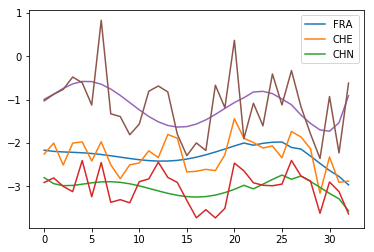

In [123]:
def get(c, with_reg=True):
    y = df_aggregated.loc[c][dates]
    
    if not with_reg:
        return y
    
    X = np.arange(len(dates))
    X = X.reshape(X.shape + (1,))
    X = np.concatenate([X ** i for i in range(8)], axis=1)
    alpha = 0.01
    smoothing_model = linear_model.Ridge(alpha)
    smoothing_model.fit(X, y)
    return smoothing_model.predict(X)

ls = ['FRA', 'CHE', 'CHN']

fig, ax = plt.subplots()
ax.plot(np.array([get(l, b) for l in ls for b in [True, False]]).T)
ax.legend(ls)
plt.show()
